# GPT-4o model with Azure OpenAI

https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models#gpt-4o-and-gpt-4-turbo

In [18]:
import base64
import datetime
import openai
import os
import requests
import sys

from dotenv import load_dotenv
from io import BytesIO
from mimetypes import guess_type
from openai import AzureOpenAI
from PIL import Image

In [2]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [3]:
check_openai_version()

Installed OpenAI version: 1.20.0
[OK] OpenAI version 1.20.0 is >= 1.0.0


In [4]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 28-May-2024 08:57:39


In [5]:
print(f"Python version: {sys.version}")

Python version: 3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]


In [6]:
print(f"OpenAI version: {openai.__version__}")

OpenAI version: 1.20.0


## Settings

In [7]:
load_dotenv("azure.env")

# Azure Open AI
api_type: str = "azure"
api_key = os.getenv("OPENAI_API_KEY")
api_base = os.getenv("OPENAI_API_BASE")

In [8]:
# This is the deployed name of your GPT-4o model from the Azure Open AI studio
model = "gpt-4o"

## Testing the model

In [9]:
def gpt4o_text(prompt):
    """
    Gpt-4o model
    """
    client = AzureOpenAI(
        api_key=api_key,
        api_version="2023-12-01-preview",
        base_url=f"{api_base}/openai/deployments/{model}",
    )

    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                ],
            },
        ],
        max_tokens=2000,
        temperature=0.7,
    )

    return response

In [10]:
result = gpt4o_text("Who are you?")
print(result.choices[0].message.content)

I'm an AI assistant designed to help you with a variety of tasks and answer questions you might have. How can I assist you today?


In [11]:
result = gpt4o_text("What is the capital of France?")
print(result.choices[0].message.content)

The capital of France is Paris.


## Using an url image

In [12]:
def gpt4o_url(image_url, prompt):
    """
    Gpt-4o model using image url
    """
    client = AzureOpenAI(
        api_key=api_key,
        api_version="2023-12-01-preview",
        base_url=f"{api_base}/openai/deployments/{model}",
    )

    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant to analyse images.",
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {"url": image_url}},
                ],
            },
        ],
        max_tokens=2000,
        temperature=0.7,
    )

    return response

In [21]:
image_url = (
    "https://pbs.twimg.com/media/Cay-vlVW4AANslG?format=jpg&name=small"
)

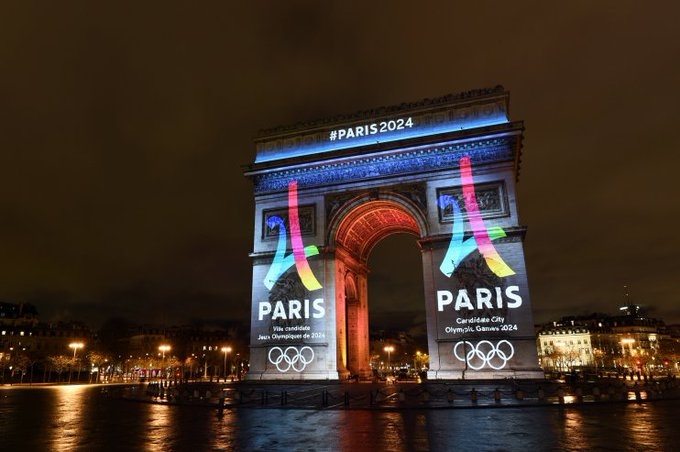

In [22]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img

In [23]:
result = gpt4o_url(image_url, "Analyse this image")
print(result.choices[0].message.content)

The image shows the Arc de Triomphe in Paris illuminated at night with a projection related to the Paris 2024 Olympic Games. The projection features the text "#PARIS2024" at the top of the monument, along with the Olympic rings, and colorful graphics symbolizing the event. The text on the monument reads "Paris Candidate City Olympic Games 2024" in both French and English. The image highlights the city's bid to host the 2024 Olympic Games and showcases the iconic landmark adorned with promotional visuals for the event.


## Using an image file

In [24]:
def image_view(image_file):
    """
    View image
    """
    if not os.path.exists(image_file):
        print(f"[Error] Image file {image_file} does not exist.")
        return None

    else:
        print(image_file)
        img = Image.open(image_file)
        display(img)

In [25]:
def local_image_to_data_url(image_path):
    """
    Get the url of a local image
    """
    mime_type, _ = guess_type(image_path)

    if mime_type is None:
        mime_type = "application/octet-stream"

    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(
            
            image_file.read()).decode("utf-8")

    return f"data:{mime_type};base64,{base64_encoded_data}"

In [26]:
def gpt4o_imagefile(image_file, prompt):
    """
    Gpt-4o model
    """
    client = AzureOpenAI(
        api_key=api_key,
        api_version="2023-12-01-preview",
        base_url=f"{api_base}/openai/deployments/{model}",
    )

    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant to analyse images.",
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": local_image_to_data_url(image_file)},
                    },
                ],
            },
        ],
        max_tokens=2000,
        temperature=0.7,
    )

    return response

## Example 1

image1.jpg


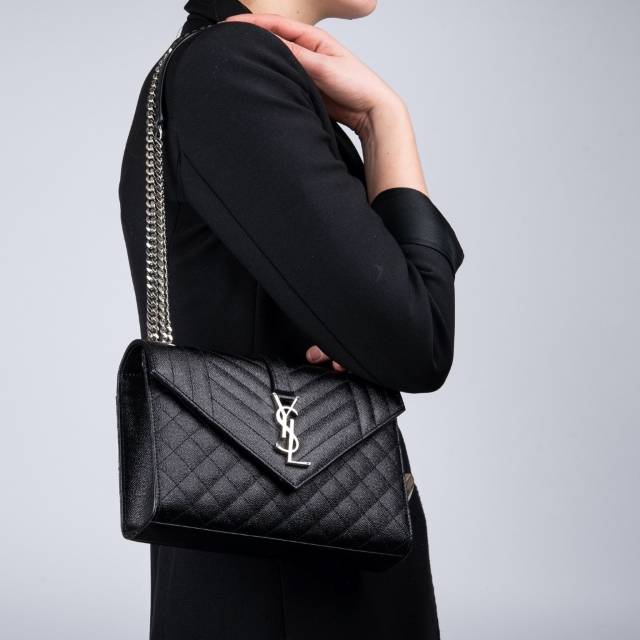

In [27]:
image_file = "image1.jpg"

image_view(image_file)

In [28]:
result = gpt4o_imagefile(image_file, "Extract the brand of the article")
print(result.choices[0].message.content)

The brand of the handbag in the image is Yves Saint Laurent (YSL).


In [29]:
result = gpt4o_imagefile(
    image_file, "Generate a product description using hashtag and emojis"
)
print(result.choices[0].message.content)

Elevate your style with this stunning black quilted shoulder bag! ✨🖤 The elegant design and luxurious finish make it the perfect accessory for any occasion. Whether you're heading to a chic event or a casual outing, this bag adds a touch of sophistication to your look. 👜💎 #LuxuryFashion #StylishAccessories #BlackBag #QuiltedBag #Fashionista #ElegantLook #ChicStyle #MustHave #Sophistication #FashionGoals


In [30]:
context = """ 
You are a fashion expert, familiar with identifying features of fashion articles from images.
A user uploads an image and asks you to describe one particular piece in the shot: jacket, shoes, pants, \
watches, etc.
"""

prompt = """
You respond with your analysis of the following fields:

1. ITEM'S TYPE: Identify if it's a top, bottom, dress, outerwear, footwear, bag, jewelry...
2. BRAND: identity the brand of the item.
3. COLOR: Note the main color(s) and any secondary colors.
4. PATTERN: Identify any visible patterns such as stripes, florals, animal print, or geometric designs.\
Feel free to use any other patterns here.
5. MATERIAL: Best guess at the material that the item is made from.
6. FEATURES: Note any unique details or embellishments, like embroidery, sequins, studs, fringes, buttons,
zippers...
7. ITEM TYPE SPECIFIC: For each type of item, feel free to add any additional descriptions that are relevant \
to help describe the item. For example, for a jacket you can include the neck and sleeve design, plus the length.
8. MISC.: Anything else important that you notice.
9. SIZE: Print the size of the item if you get it from the image.
10. ITEM SUMMARY: Write a one line summary for this item.
11. ITEM CLASSIFICATION: Classify this item into CLOTHES, BAG, SHOES, WATCH or OTHERS.
12. ITEM TAGS: Generate 10 tags to describe this item. Each tags should be separated with a comma.
13. STORIES: Write multiple stories about this product in 5 lines.
14. TWEETER PUBLICATION: Write a tweeter ad for this item with some hashtags and emojis.
15. ECOMMERCE AD: Generate an item description for a publication on a ecommerce website with a selling message.
16. FRENCH ECOMMERCE AD: Generate an item description in French for a publication on a ecommerce website with \
a selling message.

The output should be a numbered bulleted list. Just print an empty line between each items starting at item 12.
"""

retailprompt = context + prompt

In [31]:
result = gpt4o_imagefile(image_file, retailprompt)
print(result.choices[0].message.content)

1. ITEM'S TYPE: Bag

2. BRAND: Saint Laurent (YSL)

3. COLOR: Main color is black; secondary color is silver (chain and logo).

4. PATTERN: Quilted pattern.

5. MATERIAL: Likely leather with metal chain and logo.

6. FEATURES: Quilted design, silver YSL logo on the flap, silver chain strap.

7. ITEM TYPE SPECIFIC: This is a shoulder bag with a flap closure, featuring a sleek and elegant design. The chain strap adds a touch of sophistication.

8. MISC.: The bag has a structured shape, making it suitable for both casual and formal occasions.

9. SIZE: Not specified in the image.

10. ITEM SUMMARY: A chic and stylish Saint Laurent black quilted leather shoulder bag with a silver chain strap.

11. ITEM CLASSIFICATION: BAG

12. ITEM TAGS: Saint Laurent, YSL, shoulder bag, black leather, quilted bag, silver chain, elegant, luxury, designer bag, flap closure.

13. STORIES: 
- This Saint Laurent bag is perfect for elevating any outfit, from casual jeans to a little black dress.
- With its clas

## Example 2

image2.jpg


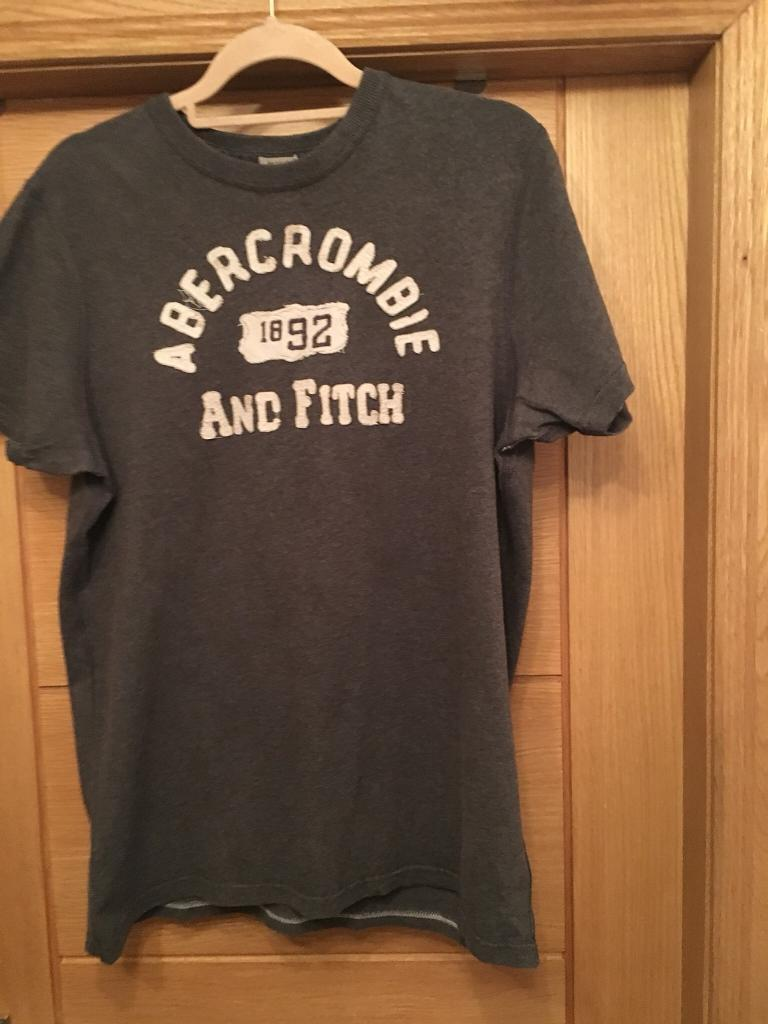

In [32]:
image_file = "image2.jpg"

image_view(image_file)

In [33]:
result = gpt4o_imagefile(image_file, "Extract the brand of the article")
print(result.choices[0].message.content)

The brand of the article is Abercrombie and Fitch.


In [34]:
result = gpt4o_imagefile(
    image_file, "Generate a product description using hashtag and emojis"
)
print(result.choices[0].message.content)

👕✨ Step up your casual game with this classic Abercrombie & Fitch tee! 🕶️ Perfect for everyday wear, this comfy and stylish shirt is a must-have in your wardrobe. 🎯

#AbercrombieAndFitch #CasualWear #Fashion #StylishTee #Comfort #EverydayEssentials #ClassicLook #WardrobeStaple #FashionGoals #OOTD #Trendy #MensFashion #FashionAddict


In [35]:
result = gpt4o_imagefile(image_file, retailprompt)
print(result.choices[0].message.content)

1. **ITEM'S TYPE:** Top (T-shirt)

2. **BRAND:** Abercrombie & Fitch

3. **COLOR:** Main color is dark gray with white lettering.

4. **PATTERN:** Solid color with printed text.

5. **MATERIAL:** Likely cotton or a cotton blend.

6. **FEATURES:** Graphic print with the brand name "Abercrombie & Fitch" and the year "1892."

7. **ITEM TYPE SPECIFIC:** Crew neck, short sleeves, standard length.

8. **MISC.:** None.

9. **SIZE:** Not visible from the image.

10. **ITEM SUMMARY:** A dark gray Abercrombie & Fitch T-shirt with white graphic print.

11. **ITEM CLASSIFICATION:** CLOTHES

12. **ITEM TAGS:** T-shirt, Abercrombie & Fitch, dark gray, graphic print, casual wear, short sleeves, crew neck, men's fashion, cotton, summer wear.

13. **STORIES:**
    - "Perfect for a casual day out, this Abercrombie & Fitch T-shirt offers comfort and style with its classic design."
    - "Embrace timeless fashion with this 1892 Abercrombie & Fitch graphic tee, ideal for pairing with jeans or shorts."
    

## Example 3

image3.png


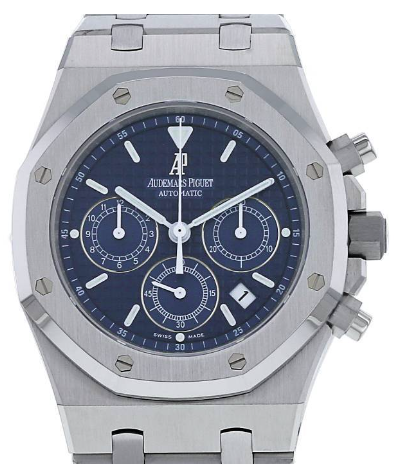

In [36]:
image_file = "image3.png"

image_view(image_file)

In [37]:
result = gpt4o_imagefile(image_file, "Analyse this image")
print(result.choices[0].message.content)

The image shows a luxury wristwatch from the brand Audemars Piguet. Here are the key features:

1. **Brand and Model**:
   - The watch is an Audemars Piguet, as indicated by the branding on the dial.

2. **Dial and Features**:
   - The dial is blue with white accents.
   - It features three sub-dials, which are typically used for chronograph functions.
   - There is a date window located between the 4 and 5 o'clock markers.
   - The words "AUTOMATIC" and "SWISS MADE" are visible on the dial, indicating that it is an automatic (self-winding) movement and made in Switzerland.

3. **Case and Bezel**:
   - The case is made of stainless steel and has an octagonal bezel with exposed screws, a signature design element of Audemars Piguet's Royal Oak series.
   - The crown and pushers on the right side of the case are likely used to manipulate the chronograph functions and set the time.

4. **Bracelet**:
   - The bracelet is also made of stainless steel, with a series of links that appear to be

In [38]:
result = gpt4o_imagefile(image_file, "Extract the brand of the article")
print(result.choices[0].message.content)

The brand of the watch is Audemars Piguet.


In [39]:
result = gpt4o_imagefile(
    image_file, "Generate a product description using hashtag and emojis"
)
print(result.choices[0].message.content)

Introducing the ultimate blend of luxury and precision – the Audemars Piguet Royal Oak Chronograph! ⌚✨

🛠️ Crafted with exquisite detail, this timepiece features a robust stainless steel case and a captivating blue dial that commands attention. The octagonal bezel, secured with signature screws, adds a touch of sophistication and durability.

🌟 Key Features:
- Self-winding automatic movement for precise timekeeping ⏲️
- Chronograph function for measuring time intervals ⏱️
- Date display at 4 o’clock 📆
- Scratch-resistant sapphire crystal 💎
- Water-resistant up to 50 meters 🌊

Perfect for the modern gentleman who appreciates elegance and functionality. Upgrade your style with this iconic watch that stands the test of time. 

#AudemarsPiguet #RoyalOak #LuxuryWatch #Timepiece #Chronograph #ElegantDesign #Precision #Sophistication #WatchCollector #LuxuryLifestyle #TimelessElegance


In [40]:
result = gpt4o_imagefile(image_file, retailprompt)
print(result.choices[0].message.content)

1. ITEM'S TYPE: Watch

2. BRAND: Audemars Piguet

3. COLOR: Main color is silver (case and band), secondary color is navy blue (dial).

4. PATTERN: The dial features a detailed chronograph layout with sub-dials, markers, and indices.

5. MATERIAL: Stainless steel

6. FEATURES: The watch has a brushed finish, an octagonal bezel with screws, a chronograph function, sub-dials, a date window, and push-piece crown protectors.

7. ITEM TYPE SPECIFIC: This is a men's watch with a large, round face and a linked bracelet. It also features a sapphire crystal face, luminous hands, and markers.

8. MISC.: The watch is an automatic model, indicating it is self-winding.

9. SIZE: Not specified in the image.

10. ITEM SUMMARY: A luxurious Audemars Piguet stainless steel chronograph watch with a navy blue dial.

11. ITEM CLASSIFICATION: WATCH

12. ITEM TAGS: luxury watch, Audemars Piguet, chronograph, stainless steel, men's watch, automatic watch, Swiss watch, navy blue dial, sapphire crystal, high-en

## Example 4

image4.jpg


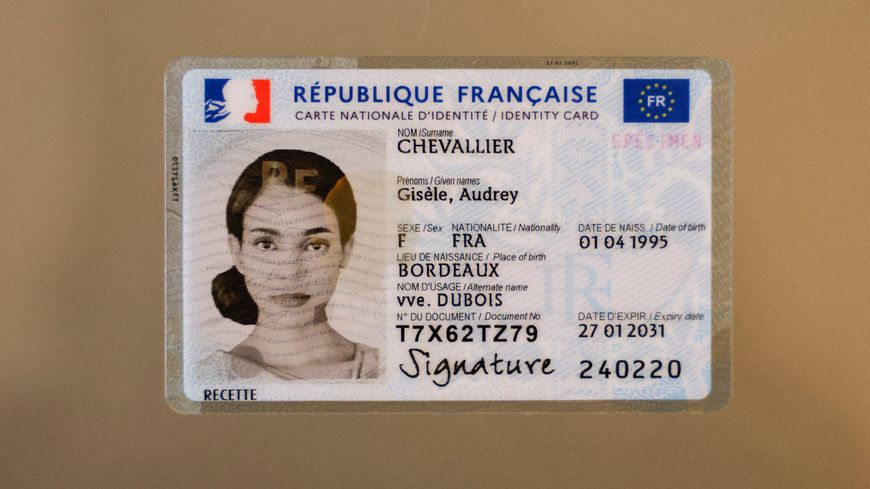

In [41]:
image_file = "image4.jpg"

image_view(image_file)

In [43]:
result = gpt4o_imagefile(image_file, "Get the name, dob and the expiration date into a json file format")
print(result.choices[0].message.content)

```json
{
  "name": "Gisèle Audrey Chevallier",
  "date_of_birth": "01 04 1995",
  "expiration_date": "27 01 2031"
}
```


In [44]:
result = gpt4o_imagefile(image_file, "We are in May 2024. What is the age of this person?")
print(result.choices[0].message.content)

The person was born on April 1, 1995. As of May 2024, they would be 29 years old.


In [46]:
result = gpt4o_imagefile(image_file, "What is the country?")
print(result.choices[0].message.content)

The country is France.


In [47]:
result = gpt4o_imagefile(image_file, "Classify this into PASSPORT, DRIVER LICENCE, ID, TRANSPORTATION CARD")
print(result.choices[0].message.content)

This is an ID card.


## Example 5

image5.jpg


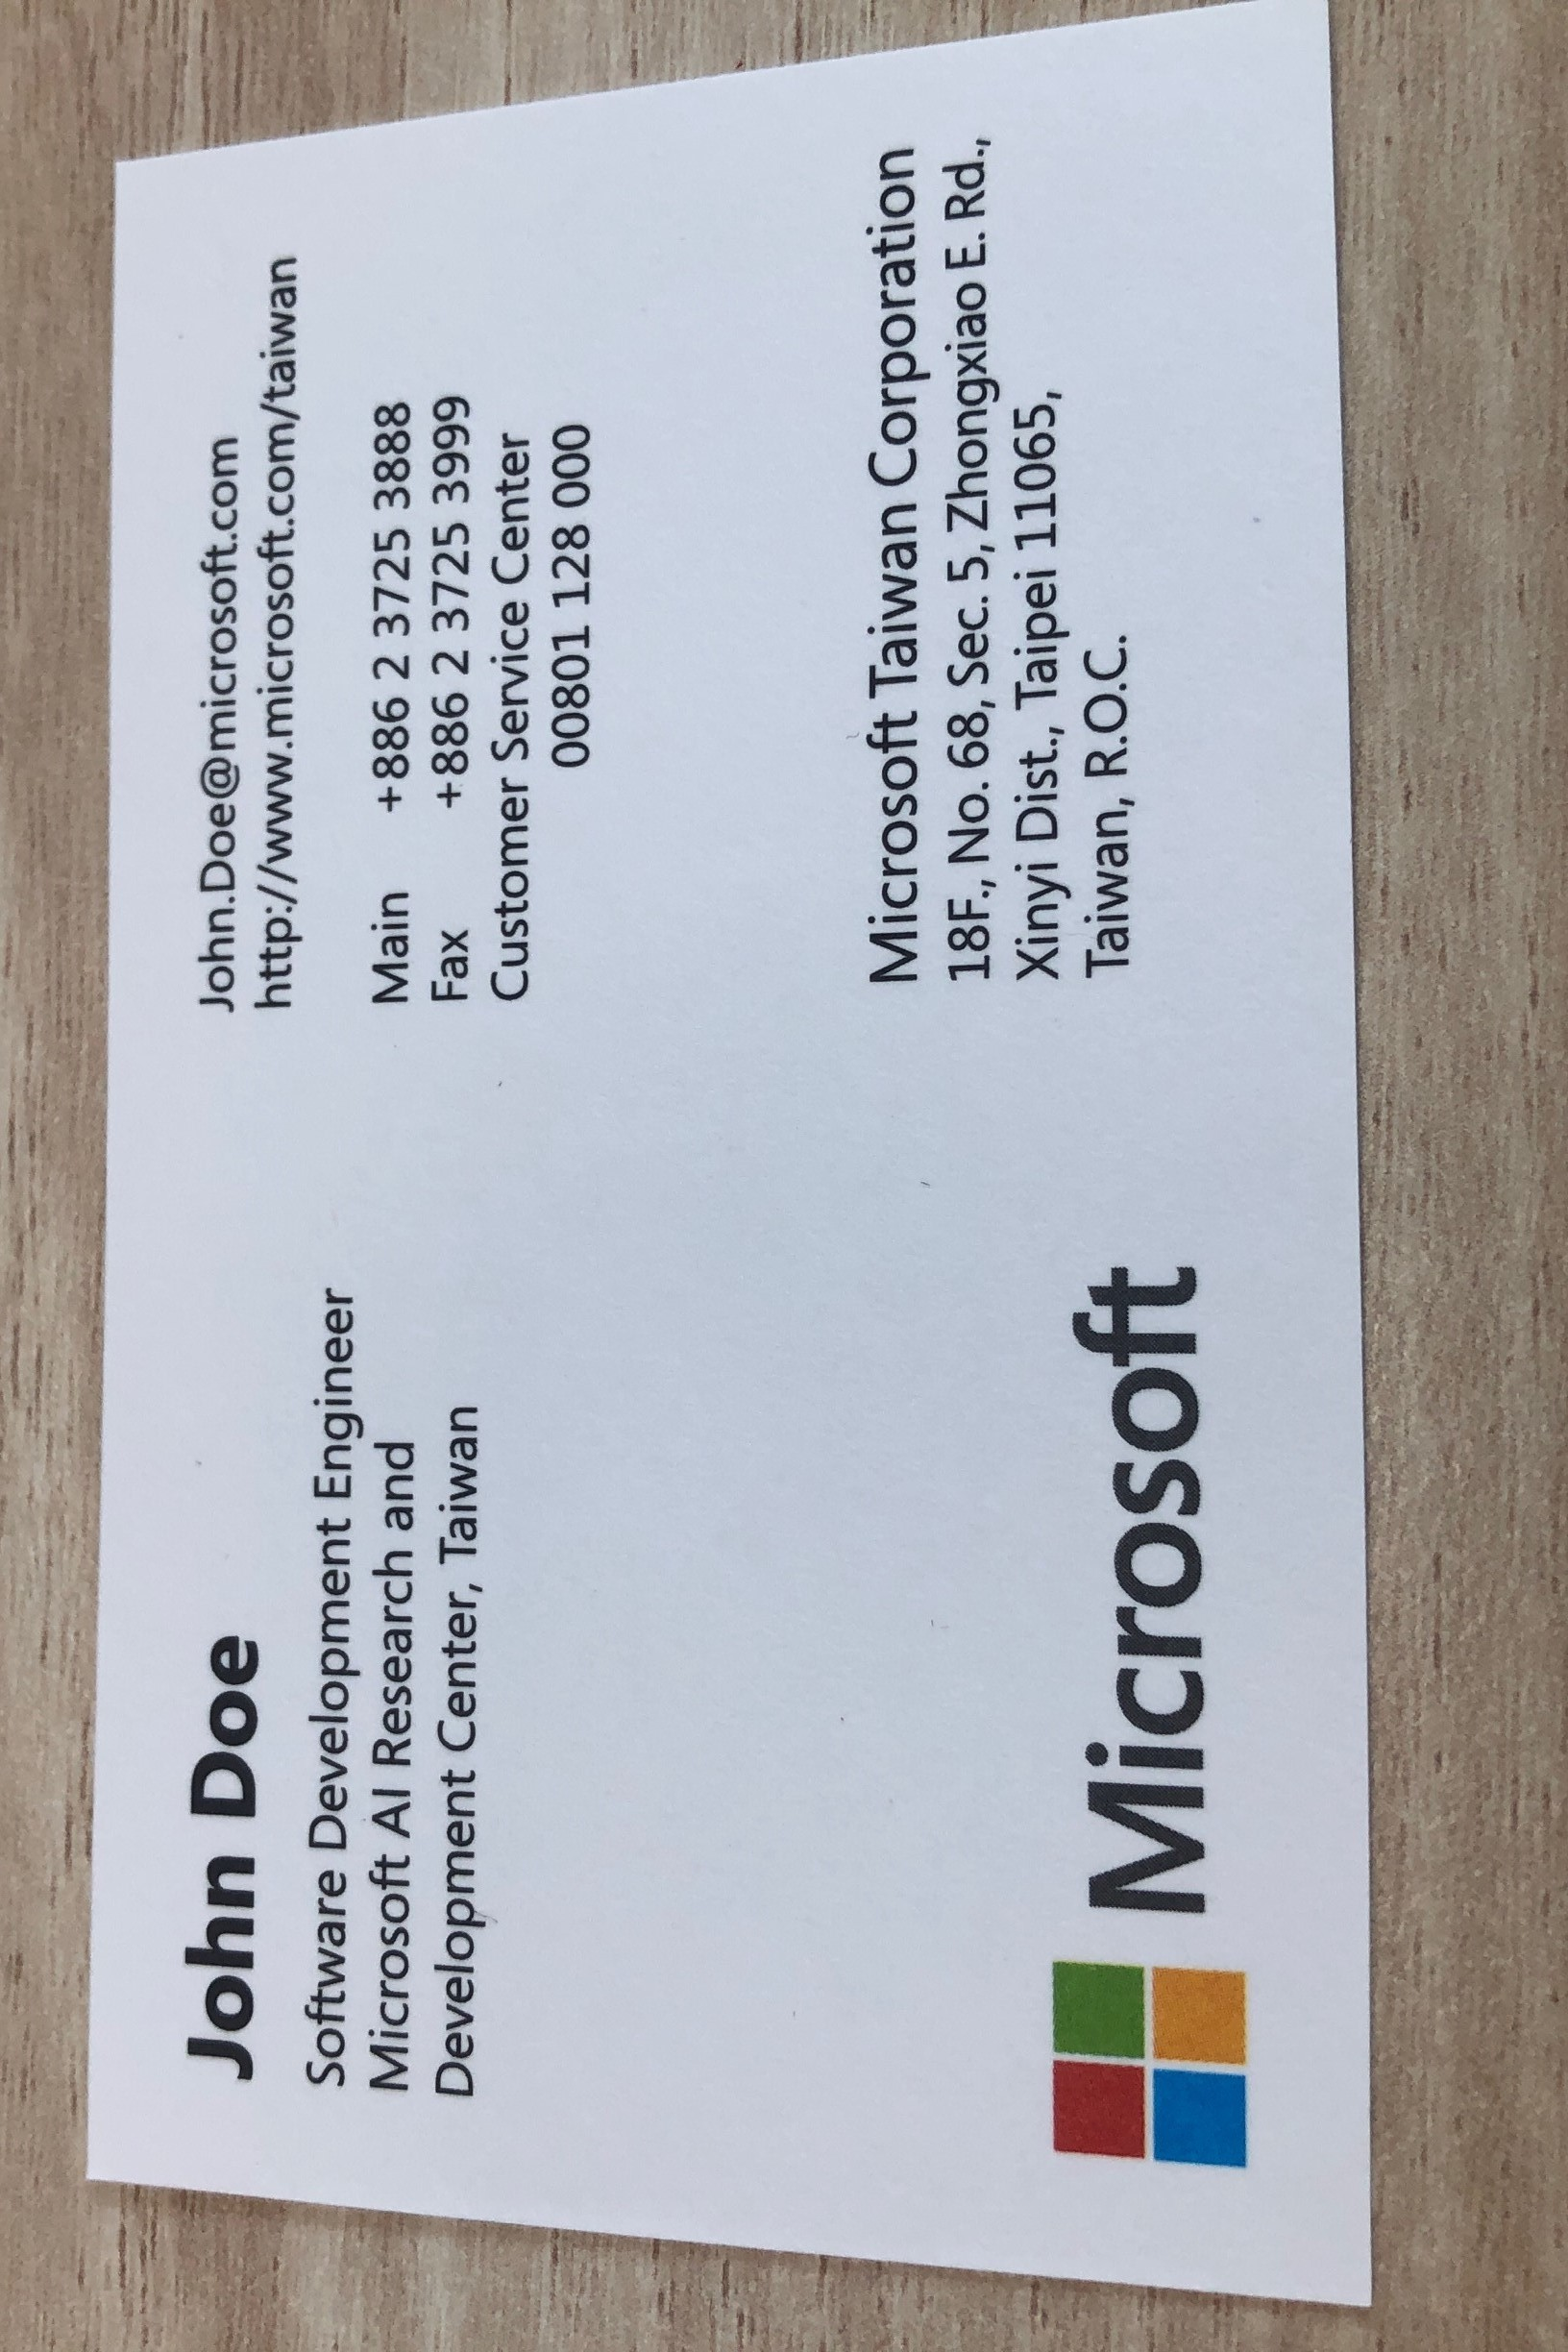

In [48]:
image_file = "image5.jpg"

image_view(image_file)

In [50]:
result = gpt4o_imagefile(image_file, "What are the main colors?")
print(result.choices[0].message.content)

The main colors on the business card are:

1. **White** (background of the card)
2. **Black** (text color)
3. **Red** (part of the logo)
4. **Green** (part of the logo)
5. **Blue** (part of the logo)
6. **Yellow** (part of the logo)


In [51]:
result = gpt4o_imagefile(image_file, "Classify this into CREDIT CARD, VISIT CARD, ID")
print(result.choices[0].message.content)

This is a VISIT CARD (commonly referred to as a business card).


In [52]:
result = gpt4o_imagefile(image_file, "What is the name and the email?")
print(result.choices[0].message.content)

The name on the business card is John Doe and the email is John.Doe@microsoft.com.


## Example 6

image6.png


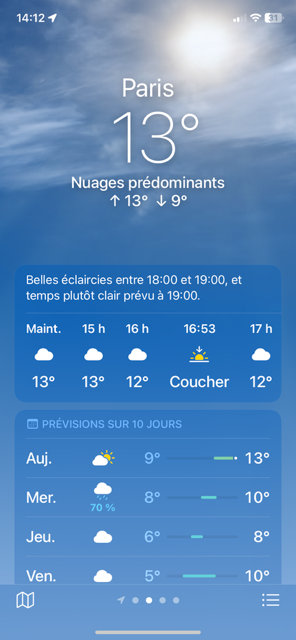

In [53]:
image_file = "image6.png"

image_view(image_file)

In [54]:
result = gpt4o_imagefile(image_file, "What is the time and the percentage of available memory?")
print(result.choices[0].message.content)

The time shown on the image is 14:12 (2:12 PM), and the percentage of available memory is 31%.


In [55]:
result = gpt4o_imagefile(image_file, "What are the days when we will have rain?")
print(result.choices[0].message.content)

From the image, it appears that rain is forecasted on the following days:

- Wednesday (Mer.) with a 70% chance of rain.

Other days in the forecast do not show rain icons, indicating that rain is not expected on those days.


In [56]:
result = gpt4o_imagefile(image_file, "Describe this")
print(result.choices[0].message.content)

This image is a weather forecast for Paris. Here are the details:

- The current temperature is 13°C with predominant clouds.
- The temperature is expected to range between a high of 13°C and a low of 9°C.
- A specific forecast mentions that there will be some clear skies between 18:00 and 19:00, with clearer weather expected by 19:00.
- The hourly forecast shows:
  - 13°C at the current time (indicated as "Maint.")
  - 13°C at 15:00
  - 12°C at 16:00
  - Sunset at 16:53
  - 12°C at 17:00
- The 10-day forecast indicates:
  - Today: High of 13°C, low of 9°C with partly cloudy conditions.
  - Wednesday: High of 10°C, low of 8°C with a 70% chance of rain.
  - Thursday: High of 8°C, low of 6°C with rainy conditions.
  - Friday: High of 10°C, low of 5°C with cloudy conditions.

The image has a clear blue background with some light clouds and a sun icon indicating the daytime.


## Example 7

image7.jpg


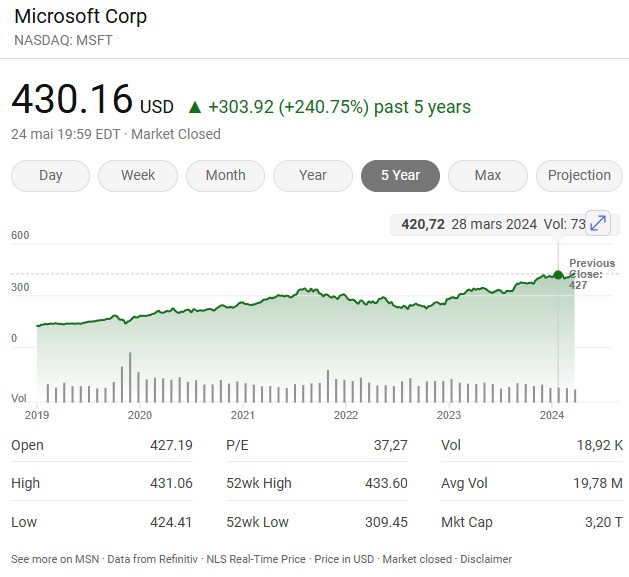

In [57]:
image_file = "image7.jpg"

image_view(image_file)

In [58]:
result = gpt4o_imagefile(image_file, "Describe this")
print(result.choices[0].message.content)

This image shows the stock performance summary of Microsoft Corporation (NASDAQ: MSFT) as of May 24th at 19:59 EDT, with the market closed. Here are the key details displayed:

1. **Current Stock Price**: $430.16 USD
2. **Price Change**: The stock has increased by $303.92, which is a +240.75% rise over the past 5 years.
3. **Time Frame**: The chart shows the stock performance over a 5-year period.
4. **Historical Price Points**:
   - Opening Price: $427.19
   - High Price: $431.06
   - Low Price: $424.41
   - 52-week High: $433.60
   - 52-week Low: $309.45
5. **Market Data**:
   - Price-to-Earnings (P/E) Ratio: 37.27
   - Volume (Vol): 18.92K
   - Average Volume (Avg Vol): 19.78M
   - Market Cap (Mkt Cap): $3.20T
6. **Chart**: The chart illustrates the stock price trend over the last 5 years, showing a general upward trajectory with some fluctuations.
7. **Previous Close**: The previous closing price was $427.
8. **Specific Data Point**: On March 28, 2024, the stock price was $420.72 w

In [59]:
result = gpt4o_imagefile(image_file, "You are a financial analyst. What is your report on this stock?")
print(result.choices[0].message.content)

### Microsoft Corp (NASDAQ: MSFT) - Stock Analysis Report

**Current Price and Performance:**
- **Closing Price (24 May 2024):** $430.16 USD
- **Price Change (5 Years):** +$303.92 USD (+240.75%)

**Key Statistics:**
- **Open:** $427.19
- **Day's High:** $431.06
- **Day's Low:** $424.41
- **52-Week High:** $433.60
- **52-Week Low:** $309.45
- **P/E Ratio:** 37.27
- **Volume:** 18.92K
- **Average Volume:** 19.78M
- **Market Cap:** $3.20T

**Performance Overview:**
Microsoft Corp has demonstrated a robust performance over the past five years, with a significant appreciation in stock price by 240.75%. The current price of $430.16 marks a substantial increase from its previous values, indicating strong investor confidence and positive market sentiment.

**Valuation:**
- **P/E Ratio of 37.27:** This suggests that the stock may be trading at a high premium compared to its earnings. While a high P/E ratio can indicate expectations of future growth, it could also suggest that the stock is overv

## Example 8

image8.png


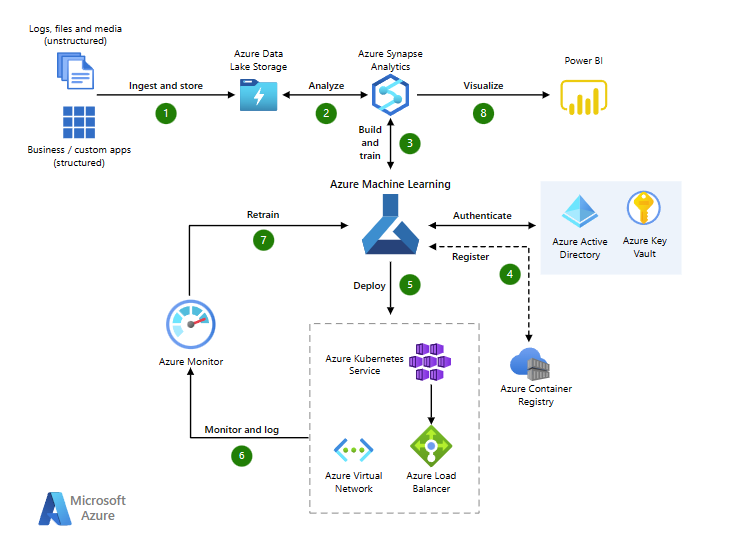

In [60]:
image_file = "image8.png"

image_view(image_file)

In [61]:
result = gpt4o_imagefile(image_file, "Describe this")
print(result.choices[0].message.content)

This diagram illustrates a workflow for integrating various Microsoft Azure services to facilitate data ingestion, analysis, machine learning, and visualization. Here is a step-by-step description of the process:

1. **Ingest and Store Data**:
   - Logs, files, and media (unstructured data) along with business/custom applications (structured data) are ingested and stored in Azure Data Lake Storage.

2. **Analyze Data**:
   - The ingested data is analyzed using Azure Synapse Analytics.

3. **Build and Train Models**:
   - Using Azure Machine Learning, the data is utilized to build and train machine learning models.

4. **Register and Authenticate**:
   - The models are registered, and Azure Active Directory and Azure Key Vault are used to authenticate the process.

5. **Deploy Models**:
   - The trained machine learning models are deployed. This involves using services like Azure Kubernetes Service (AKS), Azure Virtual Network, and Azure Load Balancer to manage the deployment.

6. **Mon

In [62]:
result = gpt4o_imagefile(image_file, "Explain this into one line")
print(result.choices[0].message.content)

The diagram illustrates an Azure-based workflow where data is ingested and stored, analyzed, used for machine learning model training, registered, deployed, monitored, and visualized using various Azure services.


In [63]:
result = gpt4o_imagefile(image_file, "List the Azure technologies I need to provision into my Azure subscription.")
print(result.choices[0].message.content)

To implement the architecture outlined in the provided diagram, you will need to provision the following Azure technologies in your Azure subscription:

1. **Azure Data Lake Storage**: For ingesting and storing structured and unstructured data.
2. **Azure Synapse Analytics**: For analyzing the data.
3. **Azure Machine Learning**: For building and training machine learning models.
4. **Azure Active Directory**: For authentication.
5. **Azure Key Vault**: For securely storing and accessing secrets and keys.
6. **Azure Container Registry**: For managing and storing Docker container images.
7. **Azure Kubernetes Service (AKS)**: For deploying and managing containers.
8. **Azure Virtual Network**: For networking the deployed services.
9. **Azure Load Balancer**: For distributing network or application traffic.
10. **Azure Monitor**: For monitoring and logging the deployed services.
11. **Power BI**: For visualizing the analyzed data.

These components together create a comprehensive data in

## Image 9

image9.jpg


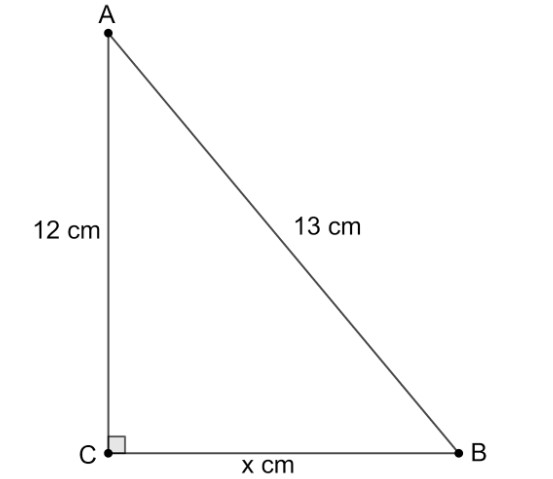

In [64]:
image_file = "image9.jpg"

image_view(image_file)

In [65]:
result = gpt4o_imagefile(image_file, "What is the dimension of the line CB?")
print(result.choices[0].message.content)

To find the length of line CB (denoted as \( x \) cm) in the right triangle \( \triangle ACB \), we can use the Pythagorean theorem. The Pythagorean theorem states that in a right-angled triangle, the square of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the other two sides.

Given:
- \( AC = 12 \) cm
- \( AB = 13 \) cm (hypotenuse)

We need to find:
- \( CB = x \) cm

Using the Pythagorean theorem:
\[ AB^2 = AC^2 + CB^2 \]
\[ 13^2 = 12^2 + x^2 \]
\[ 169 = 144 + x^2 \]
\[ 169 - 144 = x^2 \]
\[ 25 = x^2 \]
\[ x = \sqrt{25} \]
\[ x = 5 \]

So, the dimension of line CB is \( 5 \) cm.


In [66]:
result = gpt4o_imagefile(image_file, "What is the angle between the line AC and CB?")
print(result.choices[0].message.content)

The given triangle \( \triangle ABC \) is a right-angled triangle with the right angle at point \( C \).

In a right-angled triangle, the angle between the two legs that form the right angle is always \( 90^\circ \).

Therefore, the angle between line \( AC \) and line \( CB \) is \( 90^\circ \).


## Image 10

image10.png


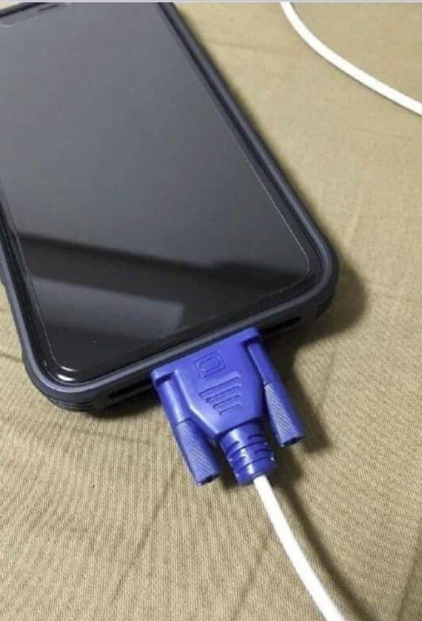

In [67]:
image_file = "image10.png"

image_view(image_file)

In [68]:
result = gpt4o_imagefile(image_file, "What's wrong here?")
print(result.choices[0].message.content)

In this image, a VGA connector is plugged into a smartphone. This is incorrect because VGA connectors are typically used for connecting display devices like monitors and projectors to computers, not smartphones. Smartphones use different types of ports such as USB-C, Lightning, or micro-USB for charging and data transfer. The VGA connector is not compatible with these ports, and attempting to use it in this way serves no practical purpose.


> End